In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Hearth

In [ ]:
ds = pd.read_csv('/content/heart_failure.csv')
ds.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


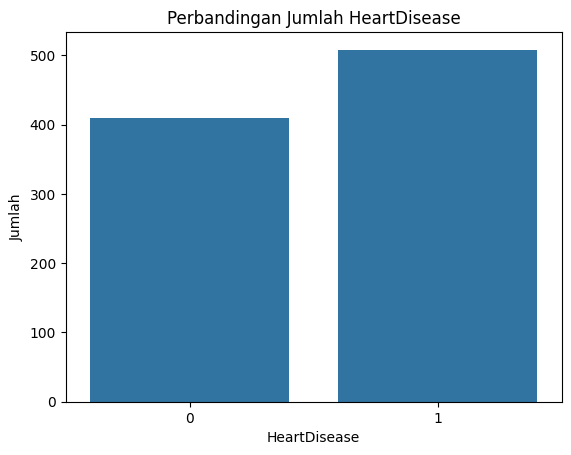

In [ ]:
# Cek persebaran datanya
sns.countplot(x='HeartDisease', data=ds)
plt.title('Perbandingan Jumlah HeartDisease')
plt.xlabel('HeartDisease')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
for col in ds.columns:
    print(f"Nilai unik pada kolom '{col}':")
    print(ds[col].unique())
    print()  # Tambahkan baris kosong untuk pemisah

Nilai unik pada kolom 'Age':
[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]

Nilai unik pada kolom 'Sex':
['M' 'F']

Nilai unik pada kolom 'ChestPainType':
['ATA' 'NAP' 'ASY' 'TA']

Nilai unik pada kolom 'RestingBP':
[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]

Nilai unik pada kolom 'Cholesterol':
[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160


Numerical = Normalisasi standar scaller

Categorial = One hot encoder

In [ ]:
ds

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
ds.duplicated().sum()

0

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
ds.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Pre Processing

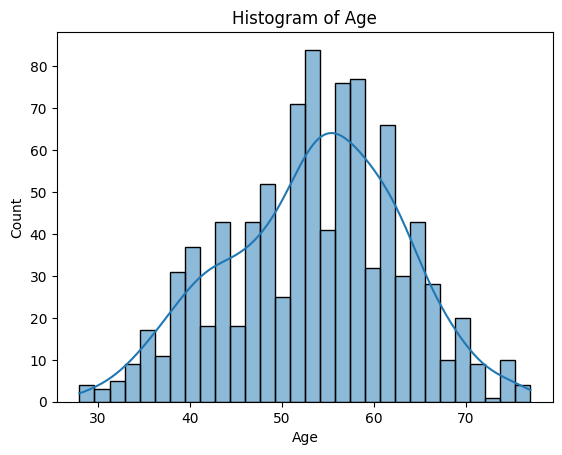

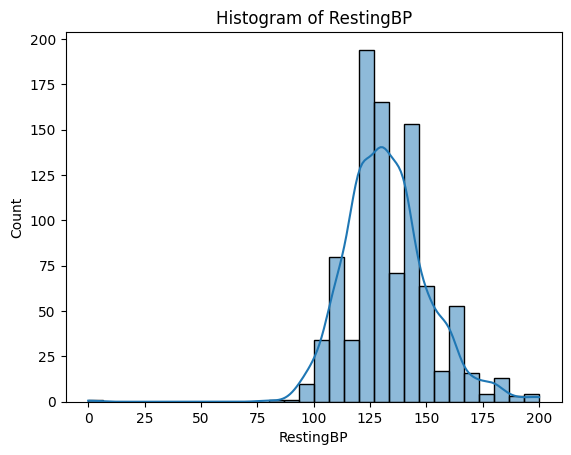

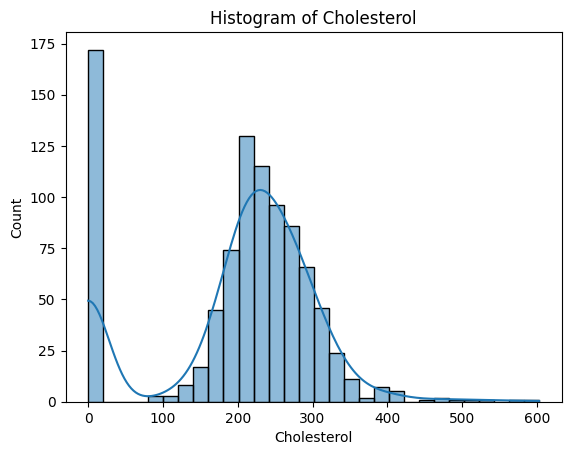

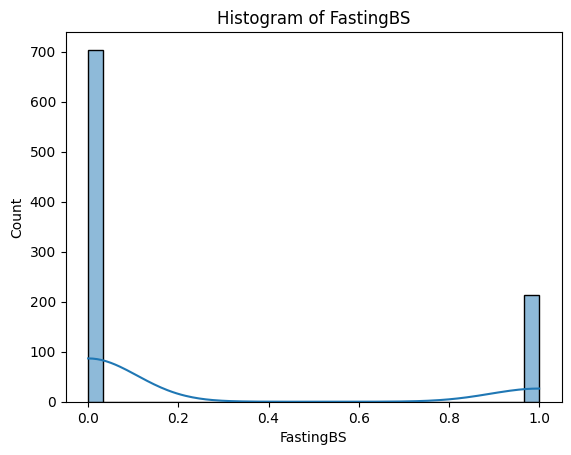

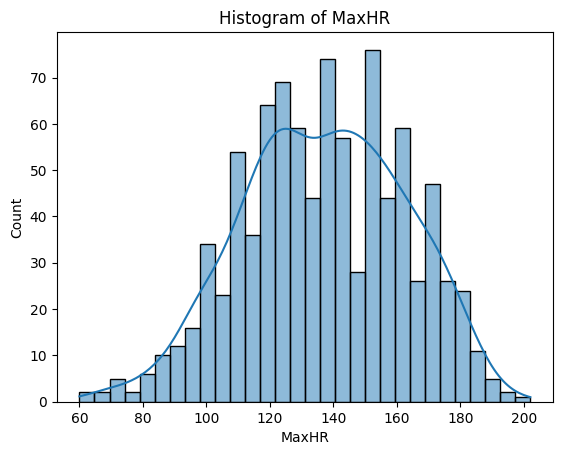

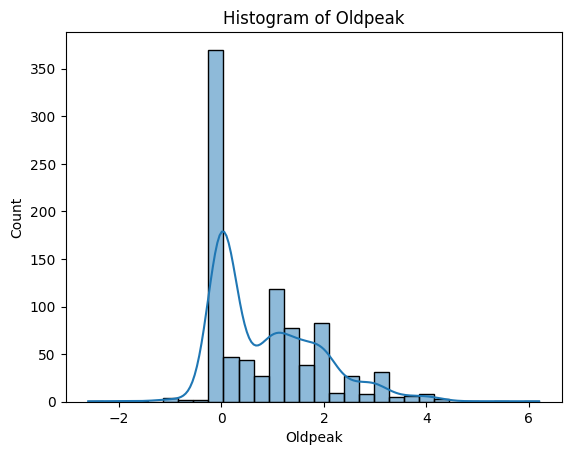

In [ ]:
num_col = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

for col in num_col:
    sns.histplot(data=ds, x=col, bins=30, kde=True)  # Anda bisa atur jumlah bins dan apakah ingin menampilkan kurva densitas
    plt.title(f'Histogram of {col}')
    plt.show()

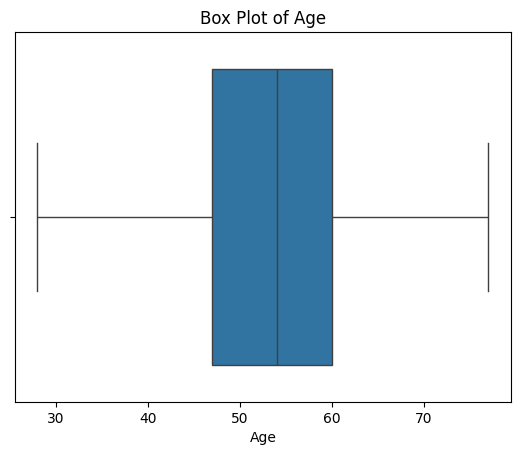

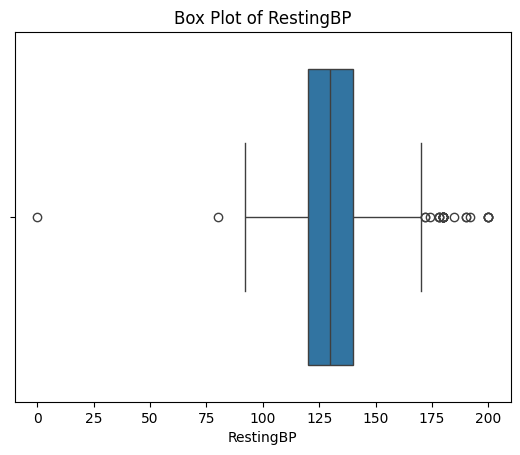

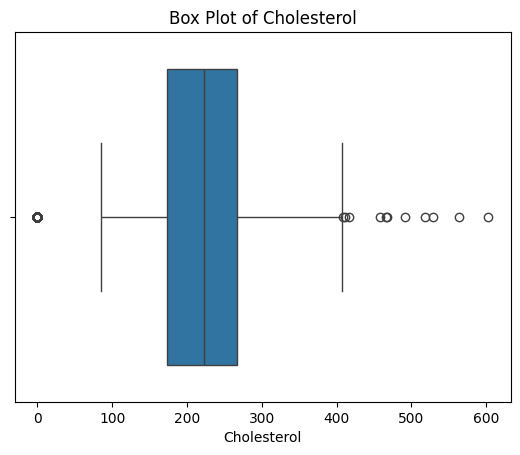

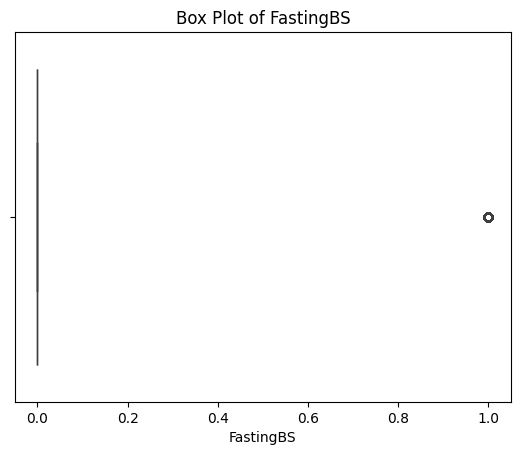

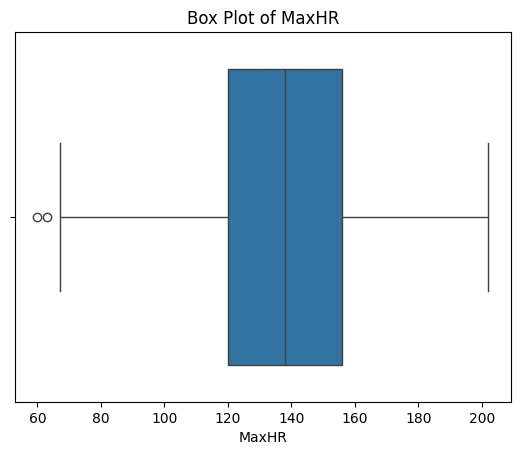

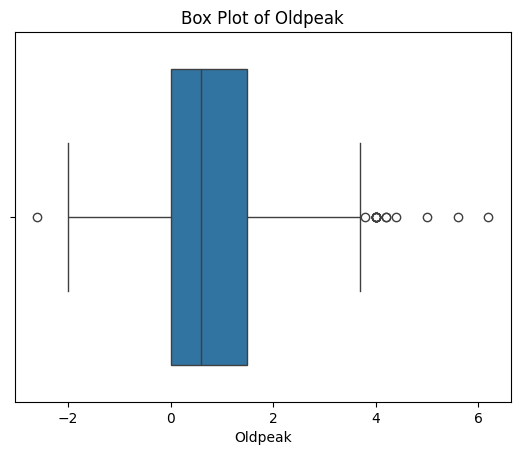

In [ ]:
for col in num_col:
    sns.boxplot(x=col, data=ds)
    plt.title(f'Box Plot of {col}')
    plt.show()

In [ ]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(ds[num_col])

ds[num_col] = scaler.transform(ds[num_col])

In [ ]:
ds.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,M,ATA,0.70,0.479270,0.0,Normal,0.788732,N,0.295455,Up,0
1,0.428571,F,NAP,0.80,0.298507,0.0,Normal,0.676056,N,0.409091,Flat,1
2,0.183673,M,ATA,0.65,0.469320,0.0,ST,0.267606,N,0.295455,Up,0
3,0.408163,F,ASY,0.69,0.354892,0.0,Normal,0.338028,Y,0.465909,Flat,1
4,0.530612,M,NAP,0.75,0.323383,0.0,Normal,0.436620,N,0.295455,Up,0


In [ ]:
cat_cols = ds.select_dtypes(include=['object']).columns.tolist()
cat_cols

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [ ]:
ds_tree = ds.copy()
ds_non_tree = ds.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Label Encoder
le = LabelEncoder()
for col in cat_cols:
    ds_tree[col] = le.fit_transform(ds_tree[col])

# One-hot encoding
ds_non_tree = pd.get_dummies(ds_non_tree, columns=cat_cols)

bool_cols = ds_non_tree.select_dtypes(include=['bool']).columns.tolist()
ds_non_tree[bool_cols] = ds_non_tree[bool_cols].astype(int)

In [ ]:
ds_non_tree

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.70,0.479270,0.0,0.788732,0.295455,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,0.428571,0.80,0.298507,0.0,0.676056,0.409091,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,0.183673,0.65,0.469320,0.0,0.267606,0.295455,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,0.408163,0.69,0.354892,0.0,0.338028,0.465909,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,0.530612,0.75,0.323383,0.0,0.436620,0.295455,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,0.55,0.437811,0.0,0.507042,0.431818,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,0.816327,0.72,0.320066,1.0,0.570423,0.681818,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,0.591837,0.65,0.217247,0.0,0.387324,0.431818,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,0.591837,0.65,0.391376,0.0,0.802817,0.295455,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [ ]:
# untuk tree use label, non tree one hot
target="HeartDisease"
y=ds_non_tree[target].values

feature_col_nontree=ds_non_tree.columns.to_list()
feature_col_nontree.remove(target)

In [ ]:
from sklearn.model_selection import train_test_split

X = ds_non_tree[feature_col_nontree]
y = ds_non_tree[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
'''def select_non_overfitting_folds(results_df, threshold=0.1):
    non_overfitting_folds = results_df[
        (results_df['recall_test'] >= results_df['recall_train']) &
        (results_df['accuracy_test'] >= results_df['accuracy_train']) &
        ((results_df['recall_train'] - results_df['recall_test']).abs() <= threshold) &
        ((results_df['accuracy_train'] - results_df['accuracy_test']).abs() <= threshold)
    ]

    return non_overfitting_folds'''

"def select_non_overfitting_folds(results_df, threshold=0.1):\n    non_overfitting_folds = results_df[\n        (results_df['recall_test'] >= results_df['recall_train']) &\n        (results_df['accuracy_test'] >= results_df['accuracy_train']) &\n        ((results_df['recall_train'] - results_df['recall_test']).abs() <= threshold) &\n        ((results_df['accuracy_train'] - results_df['accuracy_test']).abs() <= threshold)\n    ]\n\n    return non_overfitting_folds"

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,recall_score,accuracy_score
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score
'''
kf=model_selection.StratifiedKFold(n_splits=5)
acc_log = []
results = []

for fold, (trn_, val_) in enumerate(kf.split(X, y)):
  X_train_fold = X.iloc[trn_]
  y_train_fold = y.iloc[trn_]

  X_valid_fold = X.iloc[val_]
  y_valid_fold = y.iloc[val_]

  # Create and train the Logistic Regression model
  clf = LogisticRegression()
  clf.fit(X_train_fold, y_train_fold)

  # Make predictions on the validation set
  y_pred_fold = clf.predict(X_valid_fold)
  y_pred_fold_train = clf.predict(X_train_fold)

  # Calculate and print the classification report and ROC AUC score
  print(f"\nFold {fold+1}:")
  print("Classification Report testing:")
  print(classification_report(y_valid_fold, y_pred_fold))
  print("Classification Report training:")
  print(classification_report(y_train_fold, y_pred_fold_train))
  print("======================================================")
  acc = roc_auc_score(y_valid_fold, y_pred_fold)
  acc_log.append(acc)
  print(f"ROC AUC Score: {acc}")

# Calculate and print the average accuracy across all folds
avg_acc = sum(acc_log) / len(acc_log)
print(f"\nAverage ROC AUC Score: {avg_acc}")
'''


'\nkf=model_selection.StratifiedKFold(n_splits=5)\nacc_log = []\nresults = []\n\nfor fold, (trn_, val_) in enumerate(kf.split(X, y)):\n  X_train_fold = X.iloc[trn_]\n  y_train_fold = y.iloc[trn_]\n\n  X_valid_fold = X.iloc[val_]\n  y_valid_fold = y.iloc[val_]\n\n  # Create and train the Logistic Regression model\n  clf = LogisticRegression()\n  clf.fit(X_train_fold, y_train_fold)\n\n  # Make predictions on the validation set\n  y_pred_fold = clf.predict(X_valid_fold)\n  y_pred_fold_train = clf.predict(X_train_fold)\n\n  # Calculate and print the classification report and ROC AUC score\n  print(f"\nFold {fold+1}:")\n  print("Classification Report testing:")\n  print(classification_report(y_valid_fold, y_pred_fold))\n  print("Classification Report training:")\n  print(classification_report(y_train_fold, y_pred_fold_train))\n  print("======================================================")\n  acc = roc_auc_score(y_valid_fold, y_pred_fold)\n  acc_log.append(acc)\n  print(f"ROC AUC Score: {

In [ ]:
# Assuming X and y are your feature matrix and target vector
kf = model_selection.StratifiedKFold(n_splits=5)
acc_log = []
results = []

# Perform cross-validation
for fold, (trn_, val_) in enumerate(kf.split(X, y)):
    X_train_fold = X.iloc[trn_]
    y_train_fold = y.iloc[trn_]

    X_valid_fold = X.iloc[val_]
    y_valid_fold = y.iloc[val_]

    # Create and train the Logistic Regression model
    clf = LogisticRegression()
    clf.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation set
    y_pred_fold = clf.predict(X_valid_fold)
    y_pred_fold_train = clf.predict(X_train_fold)

    # Calculate metrics
    accuracy_train = accuracy_score(y_train_fold, y_pred_fold_train)
    recall_train = recall_score(y_train_fold, y_pred_fold_train, average='macro')
    accuracy_test = accuracy_score(y_valid_fold, y_pred_fold)
    recall_test = recall_score(y_valid_fold, y_pred_fold, average='macro')
    roc_auc = roc_auc_score(y_valid_fold, clf.predict_proba(X_valid_fold)[:, 1])

    # Store results in a dictionary
    results.append({
        'fold': fold + 1,
        'accuracy_train': accuracy_train,
        'recall_train': recall_train,
        'accuracy_test': accuracy_test,
        'recall_test': recall_test,
        'roc_auc': roc_auc
    })

    # Print classification reports and ROC AUC score for each fold
    print(f"\nFold {fold+1}:")
    print("Classification Report (Testing):")
    print(classification_report(y_valid_fold, y_pred_fold))
    print("Classification Report (Training):")
    print(classification_report(y_train_fold, y_pred_fold_train))
    print("======================================================")
    print(f"ROC AUC Score: {roc_auc}")

# Convert results to DataFrame
results_df = pd.DataFrame(results)

avg_metrics_LR = results_df.mean(axis=0)

# Print average metrics
print("\nAverage Metrics Across Folds:")
print(avg_metrics_LR)

# Calculate and print the average ROC AUC score across all folds
avg_acc = results_df['roc_auc'].mean()
print(f"\nAverage ROC AUC Score: {avg_acc}")


Fold 1:
Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        82
           1       0.93      0.83      0.88       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184

Classification Report (Training):
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       328
           1       0.86      0.90      0.88       406

    accuracy                           0.86       734
   macro avg       0.86      0.86      0.86       734
weighted avg       0.86      0.86      0.86       734

ROC AUC Score: 0.9491869918699186

Fold 2:
Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        82
           1       0.91      0.81      0.86       102

    accuracy                  

In [ ]:
# Assuming X and y are your feature matrix and target vector
kf = model_selection.StratifiedKFold(n_splits=5)
acc_log = []
results = []

# Perform cross-validation
for fold, (trn_, val_) in enumerate(kf.split(X, y)):
    X_train_fold = X.iloc[trn_]
    y_train_fold = y.iloc[trn_]

    X_valid_fold = X.iloc[val_]
    y_valid_fold = y.iloc[val_]

    clf = GaussianNB()  # Gaussian Naive Bayes is a common choice
    clf.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation set
    y_pred_fold = clf.predict(X_valid_fold)
    y_pred_fold_train = clf.predict(X_train_fold)

    # Calculate metrics
    accuracy_train = accuracy_score(y_train_fold, y_pred_fold_train)
    recall_train = recall_score(y_train_fold, y_pred_fold_train, average='macro')
    accuracy_test = accuracy_score(y_valid_fold, y_pred_fold)
    recall_test = recall_score(y_valid_fold, y_pred_fold, average='macro')
    roc_auc = roc_auc_score(y_valid_fold, clf.predict_proba(X_valid_fold)[:, 1])

    # Store results in a dictionary
    results.append({
        'fold': fold + 1,
        'accuracy_train': accuracy_train,
        'recall_train': recall_train,
        'accuracy_test': accuracy_test,
        'recall_test': recall_test,
        'roc_auc': roc_auc
    })

    # Print classification reports and ROC AUC score for each fold
    print(f"\nFold {fold+1}:")
    print("Classification Report (Testing):")
    print(classification_report(y_valid_fold, y_pred_fold))
    print("Classification Report (Training):")
    print(classification_report(y_train_fold, y_pred_fold_train))
    print("======================================================")
    print(f"ROC AUC Score: {roc_auc}")

# Convert results to DataFrame
results_df = pd.DataFrame(results)

avg_metrics_NB = results_df.mean(axis=0)

# Print average metrics
print("\nAverage Metrics Across Folds:")
print(avg_metrics_NB)

# Calculate and print the average ROC AUC score across all folds
avg_acc = results_df['roc_auc'].mean()
print(f"\nAverage ROC AUC Score: {avg_acc}")


Fold 1:
Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        82
           1       0.93      0.79      0.86       102

    accuracy                           0.85       184
   macro avg       0.86      0.86      0.85       184
weighted avg       0.87      0.85      0.85       184

Classification Report (Training):
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       328
           1       0.86      0.86      0.86       406

    accuracy                           0.85       734
   macro avg       0.84      0.84      0.84       734
weighted avg       0.85      0.85      0.85       734

ROC AUC Score: 0.9377092300334768

Fold 2:
Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        82
           1       0.93      0.85      0.89       102

    accuracy                  

In [ ]:
feature_col_tree=ds_tree.columns.to_list()
feature_col_tree.remove(target)

In [ ]:
from sklearn.model_selection import train_test_split

X = ds_tree[feature_col_tree]
y = ds_tree[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
795,0.285714,1,2,0.60,0.398010,1.0,1,0.943662,0,0.386364,0
25,0.163265,1,2,0.65,0.346600,0.0,1,0.830986,0,0.295455,2
84,0.571429,1,0,0.75,0.353234,1.0,1,0.457746,1,0.409091,1
10,0.183673,0,2,0.65,0.349917,0.0,1,0.577465,0,0.295455,2
344,0.469388,1,0,0.60,0.000000,1.0,1,0.309859,0,0.295455,1
...,...,...,...,...,...,...,...,...,...,...,...
106,0.408163,0,0,0.60,0.421227,0.0,2,0.352113,0,0.295455,2
270,0.346939,1,0,0.60,0.373134,0.0,1,0.563380,0,0.295455,2
860,0.653061,1,0,0.65,0.419569,0.0,1,0.591549,1,0.454545,2
435,0.653061,1,0,0.76,0.000000,0.0,2,0.408451,1,0.295455,2


In [ ]:
y_train

,HeartDisease
795,0
25,0
84,1
10,0
344,1
...,...
106,0
270,0
860,1
435,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
kf = model_selection.StratifiedKFold(n_splits=5)
acc_log = []
results = []

# Perform cross-validation
for fold, (trn_, val_) in enumerate(kf.split(X, y)):
    X_train_fold = X.iloc[trn_]
    y_train_fold = y.iloc[trn_]

    X_valid_fold = X.iloc[val_]
    y_valid_fold = y.iloc[val_]

    clf=DecisionTreeClassifier(criterion="entropy")
    clf.fit(X_train,y_train)

    # Make predictions on the validation set
    y_pred_fold = clf.predict(X_valid_fold)
    y_pred_fold_train = clf.predict(X_train_fold)

    # Calculate metrics
    accuracy_train = accuracy_score(y_train_fold, y_pred_fold_train)
    recall_train = recall_score(y_train_fold, y_pred_fold_train, average='macro')
    accuracy_test = accuracy_score(y_valid_fold, y_pred_fold)
    recall_test = recall_score(y_valid_fold, y_pred_fold, average='macro')
    roc_auc = roc_auc_score(y_valid_fold, clf.predict_proba(X_valid_fold)[:, 1])

    # Store results in a dictionary
    results.append({
        'fold': fold + 1,
        'accuracy_train': accuracy_train,
        'recall_train': recall_train,
        'accuracy_test': accuracy_test,
        'recall_test': recall_test,
        'roc_auc': roc_auc
    })

    # Print classification reports and ROC AUC score for each fold
    print(f"\nFold {fold+1}:")
    print("Classification Report (Testing):")
    print(classification_report(y_valid_fold, y_pred_fold))
    print("Classification Report (Training):")
    print(classification_report(y_train_fold, y_pred_fold_train))
    print("======================================================")
    print(f"ROC AUC Score: {roc_auc}")

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Calculate and print the average ROC AUC score across all folds
avg_acc = results_df['roc_auc'].mean()
print(f"\nAverage ROC AUC Score: {avg_acc}")

avg_metrics_DT = results_df.mean(axis=0)

# Print average metrics
print("\nAverage Metrics Across Folds:")
print(avg_metrics_DT)


Fold 1:
Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        82
           1       0.97      0.94      0.96       102

    accuracy                           0.95       184
   macro avg       0.95      0.95      0.95       184
weighted avg       0.95      0.95      0.95       184

Classification Report (Training):
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       328
           1       0.99      0.94      0.96       406

    accuracy                           0.96       734
   macro avg       0.96      0.96      0.96       734
weighted avg       0.96      0.96      0.96       734

ROC AUC Score: 0.9522955523672884

Fold 2:
Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        82
           1       1.00      0.91      0.95       102

    accuracy                  

In [ ]:
from sklearn.ensemble import RandomForestClassifier
kf = model_selection.StratifiedKFold(n_splits=5)
acc_log = []
results = []

# Perform cross-validation
for fold, (trn_, val_) in enumerate(kf.split(X, y)):
    X_train_fold = X.iloc[trn_]
    y_train_fold = y.iloc[trn_]

    X_valid_fold = X.iloc[val_]
    y_valid_fold = y.iloc[val_]

    clf=RandomForestClassifier(n_estimators=200,criterion="entropy")
    clf.fit(X_train,y_train)

    # Make predictions on the validation set
    y_pred_fold = clf.predict(X_valid_fold)
    y_pred_fold_train = clf.predict(X_train_fold)

    # Calculate metrics
    accuracy_train = accuracy_score(y_train_fold, y_pred_fold_train)
    recall_train = recall_score(y_train_fold, y_pred_fold_train, average='macro')
    accuracy_test = accuracy_score(y_valid_fold, y_pred_fold)
    recall_test = recall_score(y_valid_fold, y_pred_fold, average='macro')
    roc_auc = roc_auc_score(y_valid_fold, clf.predict_proba(X_valid_fold)[:, 1])

    # Store results in a dictionary
    results.append({
        'fold': fold + 1,
        'accuracy_train': accuracy_train,
        'recall_train': recall_train,
        'accuracy_test': accuracy_test,
        'recall_test': recall_test,
        'roc_auc': roc_auc
    })

    # Print classification reports and ROC AUC score for each fold
    print(f"\nFold {fold+1}:")
    print("Classification Report (Testing):")
    print(classification_report(y_valid_fold, y_pred_fold))
    print("Classification Report (Training):")
    print(classification_report(y_train_fold, y_pred_fold_train))
    print("======================================================")
    print(f"ROC AUC Score: {roc_auc}")

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Calculate and print the average ROC AUC score across all folds
avg_acc = results_df['roc_auc'].mean()
print(f"\nAverage ROC AUC Score: {avg_acc}")

avg_metrics_RF = results_df.mean(axis=0)

# Print average metrics
print("\nAverage Metrics Across Folds:")
print(avg_metrics_RF)


Fold 1:
Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        82
           1       0.98      0.99      0.99       102

    accuracy                           0.98       184
   macro avg       0.98      0.98      0.98       184
weighted avg       0.98      0.98      0.98       184

Classification Report (Training):
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       328
           1       0.98      0.97      0.98       406

    accuracy                           0.98       734
   macro avg       0.97      0.98      0.98       734
weighted avg       0.98      0.98      0.98       734

ROC AUC Score: 0.9950382592061215

Fold 2:
Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        82
           1       0.99      0.99      0.99       102

    accuracy                  

In [ ]:
# SUMMARY
print("Best for Random Forest:")
print(avg_metrics_RF)

print("\nBest for Decision Tree:")
print(avg_metrics_DT)

print("\nBest for Naive Bayes:")
print(avg_metrics_NB)

print("\nBest for Logistic Regression:")
print(avg_metrics_LR)

Best for Random Forest:
fold              3.000000
accuracy_train    0.977666
recall_train      0.977702
accuracy_test     0.979271
recall_test       0.979602
roc_auc           0.992576
dtype: float64

Best for Decision Tree:
fold              3.000000
accuracy_train    0.959695
recall_train      0.961819
accuracy_test     0.958601
recall_test       0.960945
roc_auc           0.960945
dtype: float64

Best for Naive Bayes:
fold              3.000000
accuracy_train    0.864917
recall_train      0.863418
accuracy_test     0.837640
recall_test       0.836097
roc_auc           0.913714
dtype: float64

Best for Logistic Regression:
fold              3.000000
accuracy_train    0.871182
recall_train      0.867670
accuracy_test     0.832175
recall_test       0.829770
roc_auc           0.911217
dtype: float64


In [ ]:
# sederhana

best_model = None
best_accuracy = 0
best_recall = 0

for model_name, best_fold in [('Random Forest', avg_metrics_RF), ('Decision Tree', avg_metrics_DT), ('Naive Bayes', avg_metrics_NB), ('Logistic Regression', avg_metrics_LR)]:
    if best_fold['accuracy_test'] > best_accuracy and best_fold['recall_test'] > best_recall:
        best_model = model_name
        best_accuracy = best_fold['accuracy_test']
        best_recall = best_fold['recall_test']

print("\nBest Model:")
print(best_model)
print("Accuracy:", best_accuracy)
print("Recall:", best_recall)


Best Model:
Random Forest
Accuracy: 0.9792706105963411
Recall: 0.979601640221411


# Pipeline

In [ ]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0.244898,1,1,0.70,0.479270,0.0,1,0.788732,0,0.295455,2
1,0.428571,0,2,0.80,0.298507,0.0,1,0.676056,0,0.409091,1
2,0.183673,1,1,0.65,0.469320,0.0,2,0.267606,0,0.295455,2
3,0.408163,0,0,0.69,0.354892,0.0,1,0.338028,1,0.465909,1
4,0.530612,1,2,0.75,0.323383,0.0,1,0.436620,0,0.295455,2
...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,1,3,0.55,0.437811,0.0,1,0.507042,0,0.431818,1
914,0.816327,1,0,0.72,0.320066,1.0,1,0.570423,0,0.681818,1
915,0.591837,1,0,0.65,0.217247,0.0,1,0.387324,1,0.431818,1
916,0.591837,0,1,0.65,0.391376,0.0,0,0.802817,0,0.295455,1


In [ ]:
from sklearn.model_selection import train_test_split

X = ds[feature_col_tree]
y = ds[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_cols),  # Scaling untuk kolom numerik
        ('cat', OneHotEncoder(), categorical_cols)  # OneHotEncoder untuk kolom kategorikal
    ])

# Membuat pipeline dengan preprocessor dan RandomForestClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=200,criterion="entropy"))
])

In [ ]:
X_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
795,0.285714,M,NAP,0.60,0.398010,1.0,Normal,0.943662,N,0.386364,Down
25,0.163265,M,NAP,0.65,0.346600,0.0,Normal,0.830986,N,0.295455,Up
84,0.571429,M,ASY,0.75,0.353234,1.0,Normal,0.457746,Y,0.409091,Flat
10,0.183673,F,NAP,0.65,0.349917,0.0,Normal,0.577465,N,0.295455,Up
344,0.469388,M,ASY,0.60,0.000000,1.0,Normal,0.309859,N,0.295455,Flat
...,...,...,...,...,...,...,...,...,...,...,...
106,0.408163,F,ASY,0.60,0.421227,0.0,ST,0.352113,N,0.295455,Up
270,0.346939,M,ASY,0.60,0.373134,0.0,Normal,0.563380,N,0.295455,Up
860,0.653061,M,ASY,0.65,0.419569,0.0,Normal,0.591549,Y,0.454545,Up
435,0.653061,M,ASY,0.76,0.000000,0.0,ST,0.408451,Y,0.295455,Up


In [ ]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(criterion='entropy',
                                        n_estimators=200))])

In [ ]:
# Train model
pipeline.fit(X_train, y_train)

# Prediksi
y_pred = pipeline.predict(X_test)

In [ ]:
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1])

# Inference

In [ ]:
dstest = pd.read_csv('/content/heart_failure.csv')
dstest.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
dstest.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0.244898,M,ATA,0.70,0.479270,0.0,Normal,0.788732,N,0.295455,Up
1,0.428571,F,NAP,0.80,0.298507,0.0,Normal,0.676056,N,0.409091,Flat
2,0.183673,M,ATA,0.65,0.469320,0.0,ST,0.267606,N,0.295455,Up
3,0.408163,F,ASY,0.69,0.354892,0.0,Normal,0.338028,Y,0.465909,Flat
4,0.530612,M,NAP,0.75,0.323383,0.0,Normal,0.436620,N,0.295455,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,M,TA,0.55,0.437811,0.0,Normal,0.507042,N,0.431818,Flat
914,0.816327,M,ASY,0.72,0.320066,1.0,Normal,0.570423,N,0.681818,Flat
915,0.591837,M,ASY,0.65,0.217247,0.0,Normal,0.387324,Y,0.431818,Flat
916,0.591837,F,ATA,0.65,0.391376,0.0,LVH,0.802817,N,0.295455,Flat


In [ ]:
new_data = [50, 'M', 'ATA', 130, 199, 1, 'Normal', 135, 'N', 0.0, 'Up']
new_data = np.array([new_data])
new_data = new_data.reshape(1, -1)  # Reshape to (1, number_of_columns)
new_data = pd.DataFrame(new_data, columns=X.columns)

In [ ]:
prediction = pipeline.predict(new_data)

prediction

array([0])

# Load Model

In [ ]:
import pickle
with open('model_forest.pkl', 'wb') as model_file:
  pickle.dump(pipeline, model_file)

In [ ]:
with open('model_forest.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

predictions = loaded_model.predict(new_data)

predictions

array([0])

# Var

In [ ]:
X_train['ChestPainType'].unique()

array(['NAP', 'ASY', 'TA', 'ATA'], dtype=object)

In [ ]:
X_train['RestingECG'].unique()

array(['Normal', 'LVH', 'ST'], dtype=object)

In [ ]:
X_train['ST_Slope'].unique()

array(['Down', 'Up', 'Flat'], dtype=object)

In [ ]:
X_train['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [ ]:
X_train['Sex'].unique()

array(['M', 'F'], dtype=object)

# Streamlit

In [ ]:
!pip --version

pip 24.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)


In [ ]:
!pip install streamlit -q

In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.91.158.80


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.91.158.80:8501

your url is: https://icy-words-fix.loca.lt
2024-09-05 17:29:11.373 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/exec_code.py", line 88, in exec_func_with_error_handling
    result = func()
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 590, in code_to_exec
    exec(code, module.__dict__)
  File "/content/app.py", line 69, in <module>
    main()
  File "/content/app.py", line 60, in main
    input_features = [age, sex_num, chest_pain_type, resting_bp, cholesterol, fasting_bs_num, resting_ecg, max_hr, exercise_angina, oldpeak, st_slope]
NameError: name 'sex_num' is not defined
2024-09-05 17:31:20.779 Uncaught app exception
Traceback (most recent call last):
  File "/usr/